In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet50
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from torch.utils.data import Dataset


### extracting 2 classes of the dataset and preparing dataloaders

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

batchSize = 64
classes = ['airpⅼane', 'autoⅿobiⅼe' ]

train_dataset = datasets.CIFAR10(root='data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.CIFAR10(root='data', train=False, transform=transforms.ToTensor(), download=True)

# Filter the dataset to keep only the samples that belong to the 2 classes
classes_to_keep = [0, 1] # classes to keep (airplane and automobile)
train_indices = [i for i, (_, label) in enumerate(train_dataset) if label in classes_to_keep]
test_indices = [i for i, (_, label) in enumerate(test_dataset) if label in classes_to_keep]

print(f"train and test sizes : {len(train_indices)} , {len(test_indices)}")

train_dataset = torch.utils.data.Subset(train_dataset, train_indices)
test_dataset = torch.utils.data.Subset(test_dataset, test_indices)

train_loader = DataLoader(dataset=train_dataset, batch_size=batchSize, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batchSize, shuffle=False)


Using cuda device


100%|██████████| 170498071/170498071 [00:02<00:00, 71305878.91it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified
train and test sizes : 10000 , 2000


### showing the images like a grid of them __8*8__

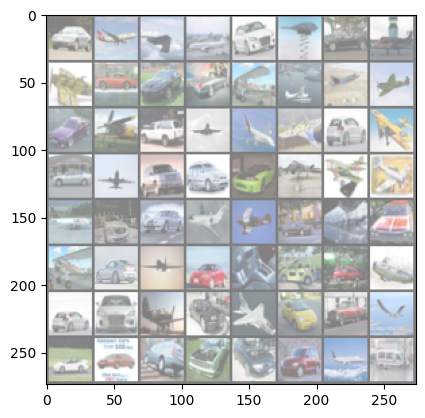

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
# showing images
imshow(torchvision.utils.make_grid(images))
# printing labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batchSize)))

def plot_eval(epoch_times, loss, accuracy):
  # Plotting
  plt.plot(loss)
  plt.xticks(epoch_times)
  plt.title('Training Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

  plt.plot(accuracy)
  plt.xticks(epoch_times)
  plt.title('Training Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.show()

## First model : crossEntropy loss , resnet 50

In [4]:
model_1 = resnet50(pretrained=True)

# Freeze all the layers except for the last fully connected layer
for param in model_1.parameters():
    param.requires_grad = False

for param in model_1.fc.parameters():
    param.requires_grad = True

model_1.fc = nn.Linear(model_1.fc.in_features,2)
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.001)
# Train the model
train_acc = list()
loss_l = []
epoch_t = range(20)
model_1 = model_1.cuda()
for epoch in epoch_t:
    epoch_loss = []
    correct_train = 0
    for (inputs, labels) in tqdm(train_loader):
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
        outputs = model_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        epoch_loss.append(loss.item())
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        correct_train += (predicted == labels).sum().item()

    print(f'Epoch {epoch+1}, Loss: {sum(epoch_loss)/len(epoch_loss)}, Accuracy: {correct_train / len(train_loader.dataset)}')
    train_acc.append(correct_train / len(train_loader.dataset))
    loss_l.append(sum(epoch_loss)/len(epoch_loss))

autoⅿobiⅼe airpⅼane airpⅼane airpⅼane autoⅿobiⅼe airpⅼane autoⅿobiⅼe airpⅼane airpⅼane autoⅿobiⅼe autoⅿobiⅼe autoⅿobiⅼe airpⅼane airpⅼane airpⅼane airpⅼane autoⅿobiⅼe airpⅼane autoⅿobiⅼe airpⅼane airpⅼane airpⅼane autoⅿobiⅼe airpⅼane autoⅿobiⅼe airpⅼane autoⅿobiⅼe autoⅿobiⅼe autoⅿobiⅼe airpⅼane airpⅼane airpⅼane airpⅼane autoⅿobiⅼe autoⅿobiⅼe airpⅼane airpⅼane autoⅿobiⅼe airpⅼane autoⅿobiⅼe airpⅼane autoⅿobiⅼe airpⅼane autoⅿobiⅼe autoⅿobiⅼe autoⅿobiⅼe autoⅿobiⅼe airpⅼane autoⅿobiⅼe autoⅿobiⅼe airpⅼane autoⅿobiⅼe airpⅼane autoⅿobiⅼe autoⅿobiⅼe airpⅼane autoⅿobiⅼe autoⅿobiⅼe autoⅿobiⅼe autoⅿobiⅼe autoⅿobiⅼe autoⅿobiⅼe airpⅼane autoⅿobiⅼe


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 164MB/s]
100%|██████████| 157/157 [00:05<00:00, 29.71it/s]


Epoch 1, Loss: 0.42207446988600833, Accuracy: 0.8154


100%|██████████| 157/157 [00:03<00:00, 51.61it/s]


Epoch 2, Loss: 0.3520956012853392, Accuracy: 0.8504


100%|██████████| 157/157 [00:03<00:00, 52.11it/s]


Epoch 3, Loss: 0.34130115769091685, Accuracy: 0.8611


100%|██████████| 157/157 [00:03<00:00, 52.14it/s]


Epoch 4, Loss: 0.31636117408230047, Accuracy: 0.8709


100%|██████████| 157/157 [00:03<00:00, 41.13it/s]


Epoch 5, Loss: 0.30531062603376474, Accuracy: 0.8722


100%|██████████| 157/157 [00:03<00:00, 46.03it/s]


Epoch 6, Loss: 0.30339996991263835, Accuracy: 0.873


100%|██████████| 157/157 [00:03<00:00, 52.15it/s]


Epoch 7, Loss: 0.28948162130679295, Accuracy: 0.8819


100%|██████████| 157/157 [00:03<00:00, 51.16it/s]


Epoch 8, Loss: 0.28883743105800286, Accuracy: 0.8825


100%|██████████| 157/157 [00:03<00:00, 41.20it/s]


Epoch 9, Loss: 0.28799390735899566, Accuracy: 0.882


100%|██████████| 157/157 [00:03<00:00, 51.11it/s]


Epoch 10, Loss: 0.2979846826404523, Accuracy: 0.8773


100%|██████████| 157/157 [00:02<00:00, 52.62it/s]


Epoch 11, Loss: 0.28819245090530177, Accuracy: 0.8822


100%|██████████| 157/157 [00:03<00:00, 50.67it/s]


Epoch 12, Loss: 0.2834479257369497, Accuracy: 0.8803


100%|██████████| 157/157 [00:03<00:00, 41.41it/s]


Epoch 13, Loss: 0.28968956326223483, Accuracy: 0.8804


100%|██████████| 157/157 [00:03<00:00, 41.82it/s]


Epoch 14, Loss: 0.2820832791032305, Accuracy: 0.8866


100%|██████████| 157/157 [00:02<00:00, 52.59it/s]


Epoch 15, Loss: 0.2896141457804449, Accuracy: 0.8793


100%|██████████| 157/157 [00:03<00:00, 46.97it/s]


Epoch 16, Loss: 0.2881741456355259, Accuracy: 0.8791


100%|██████████| 157/157 [00:03<00:00, 46.71it/s]


Epoch 17, Loss: 0.27622343063544313, Accuracy: 0.8896


100%|██████████| 157/157 [00:03<00:00, 52.31it/s]


Epoch 18, Loss: 0.29225577290650384, Accuracy: 0.8806


100%|██████████| 157/157 [00:02<00:00, 53.81it/s]


Epoch 19, Loss: 0.287867250051468, Accuracy: 0.881


100%|██████████| 157/157 [00:03<00:00, 48.41it/s]

Epoch 20, Loss: 0.2743322505218208, Accuracy: 0.8863


## evaluation for Resnet50 using crossEntropy loss

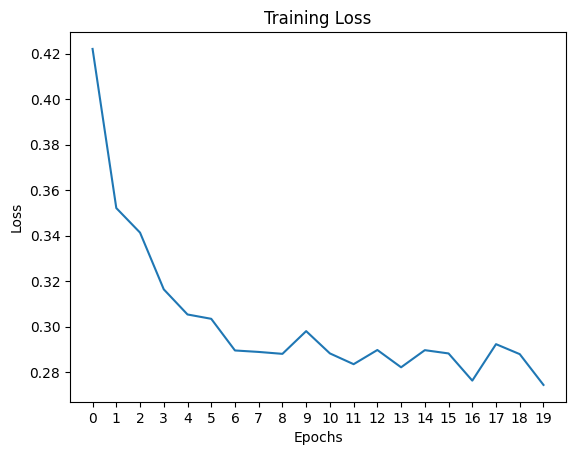

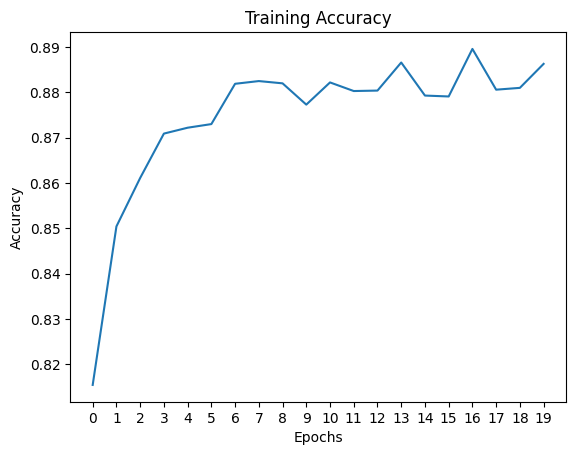

Accuracy of the network on the test images: 88 %


In [5]:
plot_eval(epoch_t,loss_l,train_acc)

correct_test = 0
total_test = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = model_1(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct_test // total_test} %')

## Create Triplet form of Cifar10 dataset 

Files already downloaded and verified


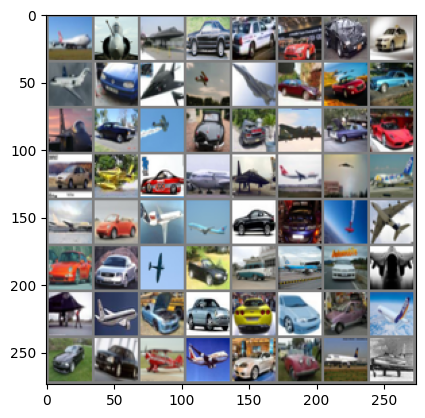

In [6]:
class TripletCIFAR10(Dataset):
    def __init__(self, root, classes, transform=None, train=True):
        self.root = root
        self.transform = transform
        cifar10 = datasets.CIFAR10(root=self.root, train=train, download=True)

        indices = [i for i, label in enumerate(cifar10.targets) if label in classes]
        self.data = cifar10.data[indices]
        self.targets = np.array(cifar10.targets)[indices]

    def __getitem__(self, index):
        anchor_image = self.data[index]
        anchor_label = self.targets[index]
        positive_indices = np.squeeze(np.where(self.targets == anchor_label))
        positive_index = np.random.choice(positive_indices)
        positive_image = self.data[positive_index]
        negative_indices = np.squeeze(np.where(self.targets != anchor_label))
        negative_index = np.random.choice(negative_indices)
        negative_image = self.data[negative_index]

        if self.transform:
            anchor_image = self.transform(anchor_image)
            positive_image = self.transform(positive_image)
            negative_image = self.transform(negative_image)

        return anchor_image, positive_image, negative_image

    def __len__(self):
        return len(self.data)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

classes = [0, 1]
MyTraindataset = TripletCIFAR10(root='./data', classes=classes, transform=transform, train=True)
Mytrainloader = torch.utils.data.DataLoader(MyTraindataset, batch_size=64, shuffle=True)
dataiter = iter(Mytrainloader)
images , _ , _= next(dataiter)
imshow(torchvision.utils.make_grid(images))

## training resnet50 Model using triplet loss  

In [7]:
model_2 = resnet50(pretrained=True)

for param in model_2.parameters():
    param.requires_grad = True
for param in model_2.fc.parameters():
    param.requires_grad = False

model_2.fc = nn.Linear(model_2.fc.in_features,2)

criterion = nn.TripletMarginLoss(margin=1.0, p=2, eps=1e-7)
optimizer = optim.Adam(model_2.parameters(), lr=0.001)

loss_l = list()
epoch_t = range(12)
model_2 = model_2.cuda()
train_acc = []
for epoch in epoch_t:
    epoch_loss = []
    correct_train = 0
    total = 0
    for data in tqdm(Mytrainloader):
        anchor, positive, negative = data
        anchor, positive, negative = anchor.to(device), positive.to(device), negative.to(device)
        optimizer.zero_grad()
        anchor_outputs = model_2(anchor)
        positive_outputs = model_2(positive)
        negative_outputs = model_2(negative)
        loss = criterion(anchor_outputs, positive_outputs, negative_outputs)
        loss.backward()
        epoch_loss.append(loss.item())
        optimizer.step()
        correct_train += ((anchor_outputs - positive_outputs).norm(2, dim=1) + criterion.margin < (anchor_outputs - negative_outputs).norm(2, dim=1)).sum().item()

    print(f'Epoch {epoch+1}, Loss: {sum(epoch_loss)/len(epoch_loss)}, Accuracy: {correct_train / len(Mytrainloader.dataset)}')

    train_acc.append(correct_train / len(Mytrainloader.dataset) )
    loss_l.append(sum(epoch_loss)/len(epoch_loss))


100%|██████████| 157/157 [00:24<00:00,  6.49it/s]


Epoch 1, Loss: 0.3347891291283118, Accuracy: 0.7699


100%|██████████| 157/157 [00:22<00:00,  6.89it/s]


Epoch 2, Loss: 0.10868271988383524, Accuracy: 0.9115


100%|██████████| 157/157 [00:23<00:00,  6.73it/s]


Epoch 3, Loss: 0.07080034931208108, Accuracy: 0.9437


100%|██████████| 157/157 [00:23<00:00,  6.75it/s]


Epoch 4, Loss: 0.06062733988829289, Accuracy: 0.951


100%|██████████| 157/157 [00:23<00:00,  6.81it/s]


Epoch 5, Loss: 0.055398694494632396, Accuracy: 0.9577


100%|██████████| 157/157 [00:23<00:00,  6.80it/s]


Epoch 6, Loss: 0.05125382944799153, Accuracy: 0.9633


100%|██████████| 157/157 [00:22<00:00,  6.86it/s]


Epoch 7, Loss: 0.033945167027888405, Accuracy: 0.9733


100%|██████████| 157/157 [00:23<00:00,  6.70it/s]


Epoch 8, Loss: 0.03872463495061276, Accuracy: 0.9711


100%|██████████| 157/157 [00:24<00:00,  6.52it/s]


Epoch 9, Loss: 0.026415302714771906, Accuracy: 0.9816


100%|██████████| 157/157 [00:23<00:00,  6.62it/s]


Epoch 10, Loss: 0.03806283805448159, Accuracy: 0.9733


100%|██████████| 157/157 [00:23<00:00,  6.67it/s]


Epoch 11, Loss: 0.014804578255743358, Accuracy: 0.9889


100%|██████████| 157/157 [00:23<00:00,  6.70it/s]

Epoch 12, Loss: 0.01143564509856663, Accuracy: 0.9903


## evalutaion for resnet50 model using triplet loss

In [3]:
# plot_eval(epoch_t,loss_l,train_acc)

## after training feature exatractor now we should train fully connected classifier

In [9]:
for param in model_2.parameters():
    param.requires_grad = False

for param in model_2.fc.parameters():
    param.requires_grad = True


criterion = nn.CrossEntropyLoss()

loss_l = list()
epoch_t = range(12)
model_2 = model_2.cuda()
train_acc = []

for epoch in epoch_t:
    epoch_loss = []
    correct_train = 0
    for (inputs, labels) in tqdm(train_loader):
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
        outputs = model_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        epoch_loss.append(loss.item())
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        correct_train += (predicted == labels).sum().item()

    print(f'Epoch {epoch+1}, Loss: {sum(epoch_loss)/len(epoch_loss)}, Accuracy: {correct_train / len(train_loader.dataset)}')
    train_acc.append(correct_train / len(train_loader.dataset))
    loss_l.append(sum(epoch_loss)/len(epoch_loss))

100%|██████████| 157/157 [00:03<00:00, 50.93it/s]


Epoch 1, Loss: 0.05677545275860321, Accuracy: 0.9758


100%|██████████| 157/157 [00:03<00:00, 50.36it/s]


Epoch 2, Loss: 0.012606697065960008, Accuracy: 0.9959


100%|██████████| 157/157 [00:03<00:00, 48.26it/s]


Epoch 3, Loss: 0.01231957263213873, Accuracy: 0.9959


100%|██████████| 157/157 [00:03<00:00, 42.00it/s]


Epoch 4, Loss: 0.012491829515485131, Accuracy: 0.9958


100%|██████████| 157/157 [00:03<00:00, 51.00it/s]


Epoch 5, Loss: 0.011598138230574536, Accuracy: 0.9961


100%|██████████| 157/157 [00:03<00:00, 50.41it/s]


Epoch 6, Loss: 0.012145980002784362, Accuracy: 0.9959


100%|██████████| 157/157 [00:03<00:00, 45.68it/s]


Epoch 7, Loss: 0.010519872565333328, Accuracy: 0.9964


100%|██████████| 157/157 [00:03<00:00, 43.52it/s]


Epoch 8, Loss: 0.014065190980858414, Accuracy: 0.9954


100%|██████████| 157/157 [00:03<00:00, 50.44it/s]


Epoch 9, Loss: 0.01187382438316942, Accuracy: 0.9966


100%|██████████| 157/157 [00:03<00:00, 50.65it/s]


Epoch 10, Loss: 0.011618907297085982, Accuracy: 0.9964


100%|██████████| 157/157 [00:03<00:00, 42.68it/s]


Epoch 11, Loss: 0.012583703112106413, Accuracy: 0.9962


100%|██████████| 157/157 [00:03<00:00, 45.56it/s]

Epoch 12, Loss: 0.011007673683799941, Accuracy: 0.9961


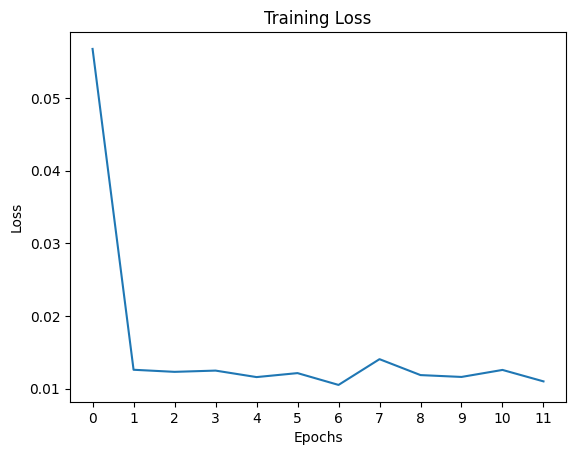

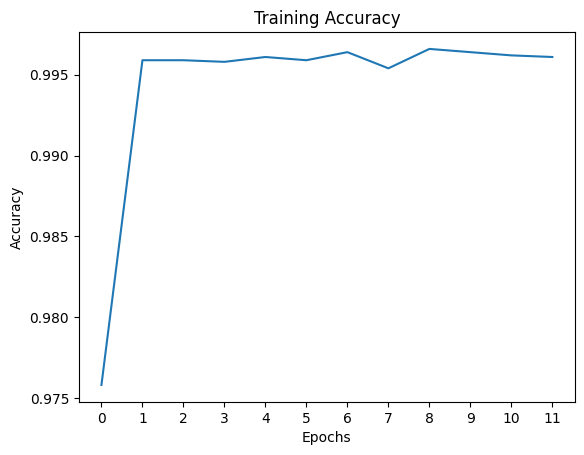

Accuracy of the network on the test images: 97 %


In [10]:
plot_eval(epoch_t,loss_l,train_acc)

correct_test = 0
total_test = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
print(f'Accuracy of the network on the test images: {100 * correct_test // total_test} %')

## caclulation of total loss and training a model for evaluating this criterion 

In [11]:
def totalLoss_criterion(anchor,positive,negative,image_output,label):
    triplet_Loss = nn.TripletMarginLoss(margin=1.0, p=2, eps=1e-7)
    cross_ent = nn.CrossEntropyLoss()
    t_loss = triplet_Loss(anchor,positive,negative)
    c_loss = cross_ent(image_output,label)
    totalLoss_value = t_loss + c_loss
    return totalLoss_value

model_3 = resnet50(pretrained=True)
model_3.fc = nn.Linear(model_3.fc.in_features,3)

optimizer = optim.Adam(model_3.parameters(), lr=0.001)
model_3 = model_3.cuda()

# Train the model
loss_l = list()
epoch_t = range(10)
train_acc = []
for epoch in epoch_t:
    epoch_loss = []
    correct_train = 0
    for (anchor,positive,negative),(images,labels) in zip(Mytrainloader,train_loader):
        anchor,positive,negative = anchor.cuda(),positive.cuda(),negative.cuda()
        images,labels = images.cuda(),labels.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        anchor_outputs = model_3(anchor)
        positive_outputs = model_3(positive)
        negative_outputs = model_3(negative)
        images_outputs = model_3(images)
        loss = totalLoss_criterion(anchor_outputs, positive_outputs, negative_outputs,images_outputs,labels)
        loss.backward()
        epoch_loss.append(loss.item())
        optimizer.step()
        _, predicted = torch.max(images_outputs.data, 1)
        correct_train += (predicted == labels).sum().item()

    print(f'Epoch {epoch+1}, Loss: {sum(epoch_loss)/len(epoch_loss)}, Accuracy: {correct_train / len(train_loader.dataset)}')
    train_acc.append(correct_train / len(train_loader.dataset))
    loss_l.append(sum(epoch_loss)/len(epoch_loss))


Epoch 1, Loss: 0.4094982571235508, Accuracy: 0.9394
Epoch 2, Loss: 0.1639471460774446, Accuracy: 0.978
Epoch 3, Loss: 0.1255490576053501, Accuracy: 0.9815
Epoch 4, Loss: 0.07515642393356675, Accuracy: 0.9891
Epoch 5, Loss: 0.0745018120858059, Accuracy: 0.9905
Epoch 6, Loss: 0.03429385164906834, Accuracy: 0.9952
Epoch 7, Loss: 0.048461417378753924, Accuracy: 0.9944
Epoch 8, Loss: 0.041900405952051446, Accuracy: 0.9935
Epoch 9, Loss: 0.040050812146424725, Accuracy: 0.9959
Epoch 10, Loss: 0.055648578785413245, Accuracy: 0.9903


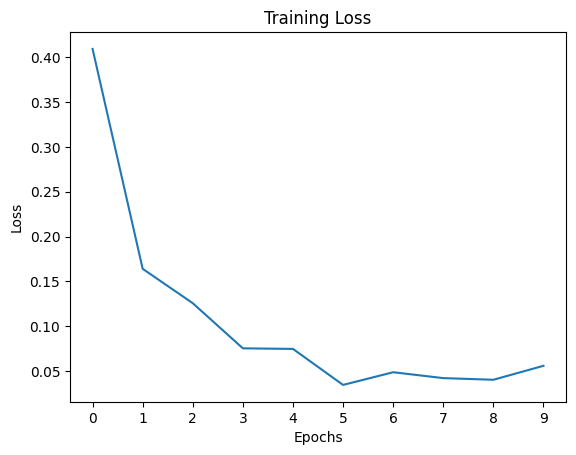

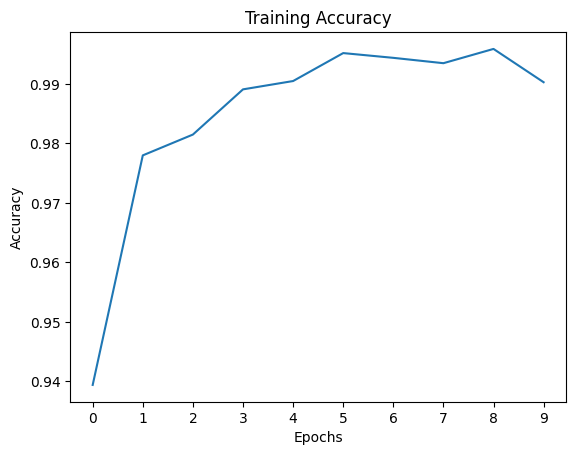

Accuracy of the network on the test images: 97 %


In [12]:
plot_eval(epoch_t,loss_l,train_acc)

correct_test = 0
total_test = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = model_3(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct_test // total_test} %')